In [ ]:
import numpy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from moscow_housing.display_data import import_data

plt.style.use('ggplot')
%matplotlib inline

In this notebook we will do EDA (explanatory data analysis). We will look at dataset standard statistics, individual feature analysis and finding any relations or trends considering multiple features. As a conlusion we will suggest features which can be added as a result of EDA

In [ ]:
#import data
data_train, data_test = import_data()

#sometimes we have to look at all the data togheter
all_data = pd.concat([data_train,data_test],ignore_index=True)

all_data.info()

In [ ]:
#Now lets look at all the basics of the data
print('Number of Training Examples = {}'.format(data_train.shape[0]))
print('Number of Test Examples = {}\n'.format(data_test.shape[0]))
print('Training X Shape = {}'.format(data_train.shape))
print('Training y Shape = {}\n'.format(data_train['price'].shape[0]))
print('Test X Shape = {}'.format(data_test.shape))
print('Test y Shape = {}\n'.format(data_test.shape[0]))
print('Train columns \n', list(data_train.columns))
print('Test columns \n', list(data_test.columns))

#check type of each column, and see how many duplicates we have:
for column in data_train.columns:
    print('\n - type of column: ', data_train.dtypes[column],'\n - number of null values: ', data_train[column].isnull().sum(), '\n - number of unique inputs: ', data_train[column].value_counts().count(),'\n', data_train[column].value_counts())


As we can see, the training and test set have the same number of columns except for price. Lets look at little bit closer at these features.
### **Features description**
* `id` - Unique ID for apartment
    - type of column:  int64
    - number of null values:  0
    - number of unique inputs:  23285
* `seller` - The type of apartment seller
 - type of column:  float64
 - number of null values:  8830
 - number of unique inputs:  4
* `price` - The listed price of the apartment (TARGET: only available in train)
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  9504
* `area_total` - Total area of the apartment
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  3249
* `area_kitchen` - Total kitchen area in the apartment
 - type of column:  float64
 - number of null values:  4721
 - number of unique inputs:  385
* `area_living` - Total living space area in the apartment
 - type of column:  float64
 - number of null values:  3882
 - number of unique inputs:  1041
* `floor`- Primary building floor of the apartment
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  84
* `rooms` - Number of rooms in the apartment
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  6
* `layout` - Overal apartment layout
 - type of column:  float64
 - number of null values:  17642
 - number of unique inputs:  3
* `ceiling` - Ceiling height in the apartment
 - type of column:  float64
 - number of null values:  11093
 - number of unique inputs:  121
* `bathrooms_shared` - Number of shared bathrooms
 - type of column:  float64
 - number of null values:  3872
 - number of unique inputs:  5
* `bathrooms_private` - Number of private bathrooms
 - type of column:  float64
 - number of null values:  3872
 - number of unique inputs:  5
* `windows_court` - Whether the apartment has windows facing a courtyard
 - type of column:  float64
 - number of null values:  8072
 - number of unique inputs:  2
* `windows_street` - Whether the apartment has windows facing a street
 - type of column:  float64
 - number of null values:  8072
 - number of unique inputs:  2
* `balconies` - Number of balconies in the apartment
 - type of column:  float64
 - number of null values:  10520
 - number of unique inputs:  5
* `loggias`- Number of loggias in the apartment (balcony-like, google it)
 - type of column:  float64
 - number of null values:  10520
 - number of unique inputs:  5
* `condition` - Current condition of the apartment
 - type of column:  float64
 - number of null values:  9810
 - number of unique inputs:  4
* `phones` - Number of phone numbers associated with the advert
 - type of column:  float64
 - number of null values:  80
 - number of unique inputs:  3
* `building_id` - ID used to map apartments to buildings
 - type of column:  int64
 - number of null values:  0
 - number of unique inputs:  6791
* `new` - Whether it is an old or new building
 - type of column:  float64
 - number of null values:  264
 - number of unique inputs:  2
* `latitude` - Latitude coordinate of building
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  6208
* `longitude` - Longitude coordinate of building
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  6159
* `district` - Administriative district within Moscow
 - type of column:  float64
 - number of null values:  130
 - number of unique inputs:  12
* `street` - Bulding street name
 - type of column:  object
 - number of null values:  0
 - number of unique inputs:  1682
* `address` - Building address (within street)
 - type of column:  object
 - number of null values:  0
 - number of unique inputs:  1851
* `constructed` - Year when the building was constructed
 - type of column:  float64
 - number of null values:  794
 - number of unique inputs:  128
* `material` - Primary building material used in building
 - type of column:  float64
 - number of null values:  3972
 - number of unique inputs:  7
* `stories` - Total number of floors in the building
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  62
* `elevator_without` - Whether the building has apartments without elevator access
 - type of column:  float64
 - number of null values:  357
 - number of unique inputs:  2
* `elevator_passenger` - Whether the building has apartments with passenger elevator access
 - type of column:  float64
 - number of null values:  357
 - number of unique inputs:  2
* `elevator_service` - Whether the building has apartments with service elevator access
 - type of column:  float64
 - number of null values:  357
 - number of unique inputs:  2
* `parking` - Parking options for building
 - type of column:  float64
 - number of null values:  6788
 - number of unique inputs:  3
* `garbage_chute` - Whether the building has a garbage chute system
 - type of column:  float64
 - number of null values:  8811
 - number of unique inputs:  2
* `heating` - Primary heating system used in the building
 - type of column:  float64
 - number of null values:  8161
 - number of unique inputs:  4

### **Categorical features**
seller, layout, windows_court, windows_street, condition, phones, building_id, new, distircit, street and address, constructed, material, elevator, parking_options, garbage_chute and heating.

All of these features will just mislead the model if we put them into it right away. They need to be worked with, and all of them are maybe not that important.
For example windows_court, models will not understand that this is actually a binary feature.

In lightGBM we can specify which parameters are categorical features, https://lightgbm.readthedocs.io/en/latest/Advanced-Topics.html, for more reading about this topic.
Will explore if using this on all features instead of grouping some is more valuable.



# **Functions**
Lets start by making some of the functions I will use to explore the data.

In [ ]:
def one_hot_encode_multiple(df, list_of_columns):
    """takes in multiple columns and runs one hot encode for each column"""
    for column_to_encode in list_of_columns:
        print(column_to_encode)
        df = one_hot_encode(df, column_to_encode)
    return df

def one_hot_encode(df, column_to_encode):
    """one hots encode for one singel column"""
    encoded_df = pd.get_dummies(df[[column_to_encode]].astype(str))
    print(encoded_df.info())
    df = pd.concat([df,encoded_df],axis=1)
    return df

def add_high_up(df):
    """add exponetital function to determine how high up a building is"""
    high_up = df.floor/df.stories
    high_up_exp = np.exp(high_up) - 1
    euler = np.exp(1)

    df['high_up'] = high_up_exp
    df['high_up'].where(df['high_up'] > euler, euler)


    return df


def add_radius(df):
    """adds radius column to dataframe"""
    df['radius'] = np.sqrt((df['latitude']-55.75)**2 + (df['longitude']-37.56)**2)

    return df

def add_direction(df):
    """adds direction to dataframe, can be one of eight categories (N,S,W,E)"""
    #straight up (north)
    normal_vector = np.array([0,1])
    #normal_vector = np.tile(normal_vector,(df.shape[0],1))
    #normal_vector = normal_vector.reshape((2,-df.shape[0]))
    temp = pd.DataFrame()
    temp['latitude'] = df['latitude']-55.75
    temp['longitude'] = df['longitude']-37.56


    apartment_vector = temp[['latitude','longitude']].to_numpy()


    #print(np.shape(apartment_vector), np.shape(normal_vector))
    angles = []
    for vector in apartment_vector:
        if vector[0] < 0:
            temp_angle = -angle_between(vector,normal_vector)
        else:
            temp_angle = angle_between(vector,normal_vector)
        angles.append(temp_angle)

    angles = [element * 10 for element in angles]


    angles_series = pd.Series(np.array(angles))

    df['direction'] = angles_series
    max = df.direction.max().round()
    min = df.direction.min().round()

    bins = [min,min*7/8,min*5/8,min*3/8,min/8,max/8,max*3/8,max*5/8,max*7/8,max]
    rounded_bins = [element.round() for element in bins]
    #print(rounded_bins)

    direction = pd.cut(df.direction, bins= rounded_bins,labels=['S','SW','W','NW','N','NE','E','SE','S'],ordered=False)
    df['direction'] = direction
    return df

def unit_vector(vector):
    """returns the unit vector if the vector"""
    return vector/np.linalg.norm(vector)

def angle_between(v1,v2):
    """returns angle between two vectors in radian"""
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u,v2_u),-1,1))

def pair_plot(df, columns):
    #plots a pairplot with the sns libary
    sns.pairplot(df[columns],
    plot_kws={'alpha': 0.6},
    diag_kws={'bins': 30})

def plot_correlation(df):
    #plots correlation in a dataframe
    corr = df.corr()
    sns.heatmap(
    corr,
    linewidths=.5,
    annot=True,
    fmt='.1f'
    )

def group_by_feature_and_price(df, feature, data_train = pd.DataFrame()):
    #makes a new column with the mean price for each group to all rows
    if data_train.empty:
        grouped = df.groupby([feature])

        mean_price = grouped['price'].mean()

        df_merged = pd.merge(df,mean_price, on=feature, how='left')

        column_name = str(feature + '_price')

        df[column_name] = df_merged['price_y']
    else:
        grouped = data_train.groupby([feature])

        mean_price = grouped['price'].mean()

        df_merged = pd.merge(df,mean_price, on=feature, how='left')

        column_name = str(feature + '_price')

        df[column_name] = df_merged['price']
    return df

def fix_radius(data_test):
    """should just be called on test data"""
    #fix all radius issues
    data_test._set_value(23,'radius',0.203899)
    data_test._set_value(90,'radius',0.203899)
    data_test._set_value(2511,'radius',0.218159)
    data_test._set_value(5090,'radius',0.218159)
    data_test._set_value(6959,'radius',0.218159)
    data_test._set_value(8596,'radius',0.218159)
    data_test._set_value(4719, 'radius',0.19580)
    data_test._set_value(9547, 'radius',0.19520)
    data_test._set_value(2529, 'radius', np.sqrt((37.464994-37.55)**2+(55.627666-55.75)**2))

    return data_test

def drop_n_largest(data_train):
    """drops 4 largest values, should only be called on training set"""
    #drop 4 largest from training data, maybe not samrt, but we will see
    data_train.drop([3217,21414,15840,13938])

def clean_data(all_data):
    """cleans the data with all the knowledge we have so far"""


    #fix ceiling issues
    all_data.loc[all_data['ceiling'] > 50,'ceiling']*=0.01
    all_data.loc[all_data['ceiling'] > 25, 'ceiling']*=0.1
    all_data.loc[all_data['ceiling'] < 0.5,'ceiling'] = float('NaN')

    #fix area_kitchen and area_living issues
    all_data['living'] = all_data.area_living/all_data.area_total
    all_data['kitchen'] = all_data.area_total/all_data.area_kitchen

    all_data.loc[all_data['living'] > 1,'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[all_data['living'] > 1,'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100

    all_data.loc[all_data.area_living/all_data.area_total > 1, 'area_living'] = float('NaN')

    all_data['living'] = all_data.area_living/all_data.area_total
    all_data['kitchen'] = all_data.area_kitchen/all_data.area_total

    all_data['sum_area'] = all_data.area_living + all_data.area_kitchen
    all_data.loc[all_data['sum_area'] == 100, 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[all_data['sum_area'] == 100, 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100

    #this fixed some few rows.
    #when printing we see some other very clear "precentage situations, fixing these
    all_data.loc[all_data['sum_area'] == 38.5, 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[all_data['sum_area'] == 38.5, 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[all_data['sum_area'] == 52.7, 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[all_data['sum_area'] == 52.7, 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[all_data['sum_area'] == 71.6, 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[all_data['sum_area'] == 71.6, 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 20), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 20), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 15), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 15), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 10), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 10), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 30), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 30), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 10), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 10), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 15), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 15), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 20), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 20), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 25), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 25), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 30), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 30), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 50), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 50), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 60) & (all_data['area_total'] > 120), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] == 60) & (all_data['area_total'] > 120), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] < 70) & (all_data['area_total'] > 120)&(all_data['rooms'] < 3), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
    all_data.loc[(all_data['sum_area'] < 70) & (all_data['area_total'] > 120)&(all_data['rooms'] < 3), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100

    return all_data

def plot_categorical(df, column1, column2):
    CrosstabResult=pd.crosstab(index=df[column1],columns=df[column2])

    CrosstabResult.plot.bar(figsize=(7,4), rot=0)

## **Pricing**
Pricing is our goal target, lets start by looking at how it is compared to other factors, and if we can see any interesting things

In [ ]:
#data_train = add_direction(data_train)
#data_train = one_hot_encode_multiple(data_train,['windows_street','windows_court','layout','district','direction'])
#data_train.info()

#log_data['price'] = np.log10(data_train.price)
#log_data.plot.hist(bins= 500)
#vi har utrolig lite små data, vil ha nærmere normalfordeling.

# plot correleation of data to see which rows to focus on
#all_data.corr().style.background_gradient(cmap='coolwarm')

## **Adding values to data**
### **Radius**
We saw that longitude and latitude didnt have an impact, lets see if we can change this into radius and check the effect

In [ ]:
#add radius to test, all data and training data
data_train = add_radius(data_train)
data_test = add_radius(data_test)
all_data = add_radius(all_data)

#all_data['direction'].value_counts().plot(kind='bar')

### **Grouping features to make more powerfull features**
#### **Districts**
I think that there could be some value in grouping the different districts, to get the average price in that district as a feature

In [ ]:
#group data by district and look at correleation for new feature
data_train = group_by_feature_and_price(data_train,'district')
data_test = group_by_feature_and_price(data_test, 'district', data_train=data_train)
all_data = group_by_feature_and_price(all_data, 'district')

### **Street**
There is also normal that a street has some sort of similar price or is in the same pricerange

In [ ]:
#group data by street
data_train = group_by_feature_and_price(data_train,'street')
data_test = group_by_feature_and_price(data_test, 'street', data_train=data_train)
all_data = group_by_feature_and_price(all_data, 'street')

### **Building**
Apartments in the same building often has the same price

In [ ]:
#group data by building_id
data_train = group_by_feature_and_price(data_train,'building_id')
data_test = group_by_feature_and_price(data_test, 'building_id', data_train=data_train)
all_data = group_by_feature_and_price(all_data, 'building_id')

### **Constructed year**
Lets check if the year an apparment was constructed can affect the price

In [ ]:
data_train = group_by_feature_and_price(data_train,'constructed')
data_test = group_by_feature_and_price(data_test, 'constructed', data_train=data_train)
all_data = group_by_feature_and_price(all_data, 'constructed')

all_data['high_up'] = all_data.floor/all_data.stories
all_data['high_up'].where(all_data['high_up'] >= 1, 1)
data_train['high_up'] = data_train.floor/data_train.stories
data_test['high_up'] = data_test.floor/data_test.stories
data_train['high_up'].where(data_train['high_up'] >= 1, 1)
data_test['high_up'].where(data_test['high_up'] >= 1, 1)
print(data_test)


### **Conclusion**
Grouping lead to us being able to use data which is actually categorical, like building_id. This model will not be able to understand what it means, the model doesnt understand the data.

To make the model understand we have two possibilities, turn it into categories (easy for few number of categories). However when we have huge categories we need to make data which the model can understand => grouping.

In [ ]:
#lets check the result, for example how they correlate with price, and also chek their pair plots
all_data.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
pair_plot(data_train,['price', 'area_total','district_price','street_price','building_id_price','constructed_price','high_up'])

#### **Constructed year and mean constructed price**
This pair comparison tells us a little bit about how the price is affected over time. In the start it is quite random, but as the time goes on we see a quite clear pattern. The price for houses constructed in the middle years are really low. Could this say something about the cuality of the buildings from this era?

Moving on if we look at this feature comparied to the histogram plot of constructed year. We can see that there we have data about very few old houses, and these have random values. However the more data we get the better the prediction is getting less and less random.
The year something is constructed is not an integer, it is an category. But looking at this plot, we may be able to intepreter it as a category.


on the pair plots we can see that a lot of the data is affected by some extreme values, lets see what happens when we remove these values, we will also have to calculate new means()

In [ ]:
#find n largest prices
n_largest = data_train.nlargest(4,'price')['price']
print(n_largest)

#removes 4 larges inputs to get better data
train_dropped = data_train.drop([3217,21414,15840,13938])
all_dropped = all_data.drop([3217,21414,15840,13938])

train_dropped = group_by_feature_and_price(train_dropped,'district')
all_dropped = group_by_feature_and_price(all_dropped, 'district')
train_dropped = group_by_feature_and_price(train_dropped,'street')
all_dropped = group_by_feature_and_price(all_dropped, 'street')
train_dropped = group_by_feature_and_price(train_dropped,'building_id')
all_dropped = group_by_feature_and_price(all_dropped, 'building_id')

#lets check new correlation and compare with previous
all_dropped.corr().style.background_gradient(cmap='coolwarm')

We can see that district_price is not affected, showing that this feature is stable and can withstans extreme values
street and building dropped a little bit, but maybe its not that important. However the pair plots might look different now.

In [ ]:
pair_plot(train_dropped,['price', 'area_total','district_price','street_price','building_id_price'])

The piar plots does now look a little bit better, at least they are more zoomed in.
### **Use of information**
Lets check if our new features can be used in the test set

In [ ]:
print('number of common buildind_id:\n',data_train['building_id'].isin(data_test['building_id']).sum())
print('common streets in both sets:\n',data_train[['street']].isin(data_test[['street']]).sum())
print('number of unique streets:', len(all_data['street'].unique()))

As we can see there is not any common buildings in the test set and train set. Therefor average building price is not important
Unless we can use some other features to train the average bulding price this information should not be used in our model

We can also see that the there are only 27 common streets in the two sets, but over 1800 unique streets combined. This information is usefull for some of the rows in the test set, but not for everyone.

However we still want to use information about the building, how can we accomplish this.

#### **Building price continue**
What else is characteristic for a building? We want to use the information from a certain type of building to give information about what these types of buildings is worth.
Is newer buildings more expnesive for example?
Lets try to group by building id and plot this with some information, to see what can be used.


## **Outliers**

Now lets look at the outliers, lets start looking at the radius

In [ ]:
max_value = data_train['radius'].max()
min_value = data_train['radius'].min()

print('rows with missing latitude and longitude in test data: \n ',data_test[['longitude','latitude']][data_test['longitude'].isnull() == True])

max_value_test = data_test['radius'].nlargest(10)
print('max radius from trainingset: \n',max_value, '\n10 highest values from test set:\n',max_value_test)

As we can see from the code above, the test set is missing 2 longitude/latitude entries
there is also 6 houses which is outsie moscow, have to remove radius for these buildings and look at other factors
Want to look at the rows which is missing longitude and latitude, do they have anything else which connects the to moscow?

row 23 and 90 is missing radius

rows outside moscov:
2511    106.579234
5090    106.579234
6959    106.579234
8596    106.579234
4719     96.021654
9547     96.012910
2529     39.132054

In [ ]:
#print(data_with_radius.loc[[23]]['street'])
#print(data_with_radius.loc[[90]]['building_id'])
#print(data_with_radius[data_with_radius['street']=='пос. Коммунарка'])
data_test._set_value(23,'radius',0.203899)
data_test._set_value(90,'radius',0.203899)



#Now we dont have any missing radius values in the test data
#lets look at the rows outside of moscov
data_test._set_value(2511,'radius',0.218159)
data_test._set_value(5090,'radius',0.218159)
data_test._set_value(6959,'radius',0.218159)
data_test._set_value(8596,'radius',0.218159)

#print(data_test.loc[[2511]][['street']])
#print(data_test.loc[[5090]][['longitude','latitude']])
#print(data_test.loc[[6959]])
#print(data_test.loc[[8596]])
#print(data_with_radius[data_with_radius['street']=='Бунинские Луга ЖК'])

#print(data_test.loc[[4719]][['street','address']])
#print(data_with_radius[['address','radius']][data_with_radius['street']=='улица Центральная'])

data_test._set_value(4719, 'radius',0.19580)
data_test._set_value(9547, 'radius',0.19520)

#print(data_test.loc[[2529]][['street','address','district']])
#print(data_with_radius[['longitude','latitude']][data_with_radius['street']=='улица 1-я Линия'])
data_test._set_value(2529, 'radius', np.sqrt((37.464994-37.55)**2+(55.627666-55.75)**2))

### **Outliers continue**
Now we have fixed everythin for radius, lets look at the most extreme prices in the training data

In [ ]:
largest_area = data_train.nlargest(3, columns='area_total')
largest_area_test = data_test.nlargest(5, columns='area_total')['area_total']
print('largest total area test : \n',largest_area_test,'\n','largest area train: \n', largest_area[['price','area_total']])

We can see that the three highest values from the training set is almost twice teh size of the training set
We have earlier seen that the plots was better when removing these. Lets check out if it is possible that this data is relevant for the test data

In [ ]:
#look at these particular rows
pd.set_option('display.max_columns', None)
print(largest_area)

The two largest ones is in the same building, same size, only difference I see is that there are different types of rooms.
However this could be usefull if building_mean_price could be used, as it states that this is a expensive building, however i think that this data is just noise for the model, with regards to the test data.

### **Oldest and Newest building for sale for each set**

In [ ]:
oldest_train = data_train.nsmallest(10, columns='constructed')['constructed']
oldest_test = data_test.nsmallest(10, columns='constructed')['constructed']

youngest_train = data_train.nlargest(10, columns='constructed')['constructed']
youngest_test = data_test.nlargest(10, columns='constructed')['constructed']
print(oldest_train,oldest_test,youngest_train,youngest_test)
#as we can see they span over the same tiemframe, meaning that there are no outliers here.

### **Ceiling**
When testing, with a model, we experienced that ceiling was behaving a little bit strange. Lets look into this and look for outliers.

In [ ]:
#make boxplot
#all_data.boxplot(column= 'ceiling')
#data_train.boxplot(column= 'ceiling')
#data_test.boxplot(column= 'ceiling')

#locate cm values:
all_data_ceiling_cm = all_data[all_data['ceiling'] > 50]

#all_data_ceiling_cm.boxplot(column = 'ceiling')
#this data is consistent, and could be turned into m
all_data.loc[all_data['ceiling'] > 50,'ceiling']*=0.01


#now we have som entries which is between 25 and 30
all_data_ceiling_error = all_data[all_data['ceiling'] > 25]
#all_data_ceiling_error.boxplot(column = 'ceiling')
#print(all_data_ceiling_error[['price','ceiling','area_total']])

#i think this data is given in desimeter, and could be converted into cm
all_data.loc[all_data['ceiling'] > 25, 'ceiling']*=0.1

#Now we can try to give values to the ones ranging from 3.5 to 8. Some of them is probably correct.
#lets firs look at maximum value
#all_data_ceiling_6 = all_data[all_data['ceiling']>6.4]
#found two duplicate rows, except from room.
#The highest observed ceiling height which i belive is 3,5 m, and smallest is 2.40.
#Lets assume that ceiling heigh can be up towards 4 meters in the most luxurious apartmens.
#then for example ceiling heights ranging from 8 to 5 meters could possibly be two story buildings.
#the solution here is just adding the average height of the two floors into one
#2.2m is minimum, 2.4m is standard and 2.6m is considered good according to internet
#if we take this into account, a ceiling of 8 m should be a three story building:

#all_data.loc[all_data['ceiling'] > 7.2, 'ceiling']*=0.3333

#the buildings between 7.2 and 4.6 should be considered as two story buildings
#all_data.loc[all_data['ceiling'] > 4.6,'ceiling']*=0.5

#highest_now = all_data['ceiling'].argmax()
#highest_row = all_data.loc[highest_now]
#print(highest_row)

#there is some null values, these should be replaced with nan
all_data.loc[all_data['ceiling'] < 0.5,'ceiling'] = float('NaN')
all_data.boxplot(column='ceiling')


We can clearly see that there is a big difference in how the data is entered. And that it is the same problem both in test and train.
We see three ways of entering ceiling data, one in cm and two distinct group in cm.
The goal is to get all the data in m.

Now all the data is in the same range, but there is still quit big difference. We think this is because there is differnet number of floors in each appartment.
Because there is no information about number of floors for each apartment, we think it is good to keep these differences, so that




### **LIVING AREA AND KITCHEN AREA**
When testing models the model aslo did worse when we trained them with living and kitchen area included. Therefore we think it might be something wrong in how thtis data is presented.
Here we will look at the kitchen and living area compared to total area

In [ ]:
all_data['living'] = all_data.area_living/all_data.area_total
all_data['kitchen'] = all_data.area_total/all_data.area_kitchen
#all_data.boxplot(column='living')
#I expected this number to be less than 1, looking at the boxplot this doesnt give much sense

all_data_living_1 = all_data[all_data['living'] > 1]

#looking at this data this is all very small apparments. As some columns is very close to sum living and kitchen to 1, i think all of these are in precentage.
#the ones who dont add up have a private bathroom, meaning that this takes up the rest of the space
#solution is to multiply. However, how do we find these errors among the bigger appartmens.

#print(all_data[all_data.index.duplicated()])
all_data.loc[all_data['living'] > 1,'area_living'] = all_data['area_living'] * all_data['area_total']/100
all_data.loc[all_data['living'] > 1,'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100

#There are errors in row 842, 12595,13573, 25924. Here area living is bigger than area_total, therefore i will just put NaN
all_data.loc[all_data.area_living/all_data.area_total > 1, 'area_living'] = float('NaN')

all_data['living'] = all_data.area_living/all_data.area_total
all_data['kitchen'] = all_data.area_kitchen/all_data.area_total

#Now we have no obvious errors, but i know there are still some errors in these columns, lets look at the ones with a really low score.

#all_data_small_living = all_data[all_data['living'] < 0.2]
#all_data_big_living = all_data[all_data['living'] > 0.9]
#print(all_data_small_living,'\n',all_data_big_living)
#there is a clear tendency that there are still a lot of precentage in the data. It is quite clear that if the sum of area_kitchen and area_living sums up to 100, it is given in precentage
all_data['sum_area'] = all_data.area_living + all_data.area_kitchen
all_data.loc[all_data['sum_area'] == 100, 'area_living'] = all_data['area_living'] * all_data['area_total']/100
all_data.loc[all_data['sum_area'] == 100, 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100

#this fixed some few rows.
#when printing we see some other very clear "precentage situations, fixing these
all_data.loc[all_data['sum_area'] == 38.5, 'area_living'] = all_data['area_living'] * all_data['area_total']/100
all_data.loc[all_data['sum_area'] == 38.5, 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
all_data.loc[all_data['sum_area'] == 52.7, 'area_living'] = all_data['area_living'] * all_data['area_total']/100
all_data.loc[all_data['sum_area'] == 52.7, 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
all_data.loc[all_data['sum_area'] == 71.6, 'area_living'] = all_data['area_living'] * all_data['area_total']/100
all_data.loc[all_data['sum_area'] == 71.6, 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 20), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 20), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 15), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 15), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 10), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 10), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 30), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 80) & (all_data['area_kitchen'] == 30), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 10), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 10), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 15), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 15), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 20), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 20), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 25), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 25), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 30), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 30), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 50), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 90) & (all_data['area_kitchen'] == 50), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 60) & (all_data['area_total'] > 120), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] == 60) & (all_data['area_total'] > 120), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] < 70) & (all_data['area_total'] > 120)&(all_data['rooms'] < 3), 'area_living'] = all_data['area_living'] * all_data['area_total']/100
all_data.loc[(all_data['sum_area'] < 70) & (all_data['area_total'] > 120)&(all_data['rooms'] < 3), 'area_kitchen'] = all_data['area_kitchen'] * all_data['area_total']/100




all_data['sum_area'] = all_data.area_living + all_data.area_kitchen
all_data['living'] = all_data.area_living/all_data.area_total
all_data['kitchen'] = all_data.area_kitchen/all_data.area_total

#there is some cases with sum_area bigger than total area, meaning that one of the inputs is wrong. In these cases we will just put nan
#need to figure out which gives best results, which change
all_data.loc[all_data['sum_area'] > all_data['area_total'], 'area_living'] = float('NaN')

all_data_small_living = all_data[all_data['living'] < 0.3]
all_data_big_living = all_data[all_data['living'] > 0.8]
print(all_data_small_living[['area_total','area_living','area_kitchen','sum_area','rooms']],'\n',all_data_big_living[['area_total','area_living','area_kitchen','sum_area','rooms']])
n = 10
#print(all_data[all_data['kitchen'] > 0.5][['area_total','area_living','area_kitchen','sum_area','rooms']])
#print(all_data['sum_area'].value_counts()[:n].index.tolist())
#print(all_data[(all_data['sum_area'] < 70) & (all_data['area_total'] > 160)][['area_total','area_living','area_kitchen','sum_area','rooms']])
#as we can see there is four rows with higher area living than area total, i think the solution here is to

all_data.boxplot(column='kitchen')

### **Missing data**
Some colums have a lot of misssing data, lets look at a way for each column.
Layout is the colums with the most missing data, lets take a lot at that

In [ ]:
layout_data = data_train['layout']
print('number of missing values: ',layout_data.isnull().sum())

#check correleation between layout and other data
layout_corr = data_train.corr()
print(layout_corr['layout'].nlargest(4))
#layout_corr.style.background_gradient(cmap='coolwarm')

#didnt find anythin, will check difference in price among nan values and thos who actually have floor
mean_price_without_nan = data_train[~data_train['layout'].isnull()]['price'].mean()
mean_price_with_nan = data_train[data_train['layout'].isnull()]['price'].mean()

print(mean_price_without_nan,mean_price_with_nan)
#these prices ar3e quit similar, lets check year.

mean_year_without_nan = data_train[~data_train['layout'].isnull()]['constructed'].mean()
mean_year_with_nan = data_train[data_train['layout'].isnull()]['constructed'].mean()
print(mean_year_without_nan,mean_year_with_nan)
#as we can see there are quite strong evidence that there is a correleation betweem if layous is mising or not, and building year

#From my understanding, the second most important feature is the size of the living room, lets see how many null values we have here
print('trainig set:', data_train['area_living'].isnull().sum(),'\ntest set: ', data_test['area_living'].isnull().sum())

#There is a lot of missing values, how can we fix this, check if we group by building, how good the correleation betweem actual and buding average
grouped_by_building = data_train.groupby(['building_id'])
mean_area_living = grouped_by_building['area_living'].mean()
print(mean_area_living)

data_with_group = pd.merge(data_train,mean_area_living, on='building_id', how='left')

data_test['mean_area_living'] = data_with_group['area_living_y']

corr = data_test.corr()
corr.style.background_gradient(cmap='coolwarm')
#this did not have a high correlation, and can not be used. Lets try and make a function for fin

## **Missing Data continue**

If there is missing data in the categorical data, ant the data is very turned towards one side, it could be good to just assume thahtthe rest of the data also is like that.

Lets start by plotting all of the different categorical data.
categorical_data = ['seller','layout', 'windows_court', 'windows_street', 'condition', 'building_id','new','district','street',
                    'address', 'material', 'elevator_without', 'elevator_passenger', 'elevator_service', 'parking','garbage_chute', 'heating']


To compare categorical and integer data, we need to conecrt the integer data to categorical.

In [ ]:
all_data['area_groups'] = pd.qcut(all_data.area_total, q=6)
all_data['ceiling_groups'] = pd.qcut(all_data.ceiling, q=8)
all_data['radius_groups'] = pd.qcut(all_data.radius, q=8)
data_train['price_groups'] = pd.qcut(data_train.price, q=6)
all_data['stories_groups'] = pd.qcut(all_data.stories, q=10)
all_data['floor_groups'] = pd.qcut(all_data.floor, q=6)
all_data['constructed_groups'] = pd.qcut(all_data.constructed, q=8)

In [ ]:
#seller
all_data['seller'].value_counts().plot(kind='bar')
#seller has a nice distribution, cant send everything into one group.
plot_categorical(all_data,'seller','new')
plot_categorical(all_data,'seller','constructed_groups')
#can clearly see that if new is 1, then seller is 3. If new is 0, then seller is not clear.
plot_categorical(all_data,'district','seller')
plot_categorical(all_data, 'radius_groups','seller')
#quite clear, in district 11 and 0 the seller is mainly 3, however in district 6 and 3, the seller is 1.
#in short radius, the seller is 3, in high radius the seller is 1.

plot_categorical(all_data, 'stories_groups','seller')
plot_categorical(all_data, 'condition','seller')
#seller type 3 doesnt care to input condition. Condition is missing 14000 values, seller type 3 has 12000 (soon more values, sick)

In [ ]:
#layout
all_data['layout'].value_counts().plot(kind='bar')


In [ ]:
#layout and constructed
plot_categorical(all_data,'layout','constructed')
#too little data so say somehting smart. Seems like quite the same except for 0

In [ ]:
#condition and layout
plot_categorical(all_data,'condition','layout')
#very similar, not good

In [ ]:
#windowsCourt

all_data_2 = all_data[all_data['windows_street']==1]
all_data_2['windows_court'].value_counts().plot(kind='bar')

plot_categorical(all_data_2,'stories_groups','windows_court')
plot_categorical(all_data_2,'radius_groups','windows_court')
plot_categorical(all_data_2,'area_groups','windows_court')
plot_categorical(all_data_2,'material','windows_court')
plot_categorical(all_data_2,'parking','windows_court')
plot_categorical(all_data_2,'constructed_groups','windows_court')
plot_categorical(all_data_2,'condition','windows_court')
plot_categorical(all_data_2,'new','windows_court')
plot_categorical(all_data_2,'balconies','windows_court')
plot_categorical(all_data_2,'loggias','windows_court')

In [ ]:
#Windows street
all_data['windows_street'].value_counts().plot(kind='bar')

In [ ]:
#window street and window court, very corellated, can be used!!!!
plot_categorical(all_data,'windows_court', 'windows_street')
#best inromation here is that if there is not a window by the court, there is 100% a window at the street
plot_categorical(all_data,'windows_street', 'windows_court')
#here we can again see that if there is no window to the street, there is a windows court
#can be used if we can learn one of them, and then predict the other.
plot_categorical(all_data,'stories_groups','windows_street')
plot_categorical(all_data,'radius_groups','windows_street')
plot_categorical(all_data,'area_groups','windows_street')
plot_categorical(all_data,'material','windows_street')
plot_categorical(all_data,'parking','windows_street')
plot_categorical(all_data,'constructed_groups','windows_street')
plot_categorical(all_data,'condition','windows_street')
plot_categorical(all_data,'new','windows_street')
plot_categorical(all_data,'balconies','windows_street')
plot_categorical(all_data,'loggias','windows_street')

In [ ]:
#condition, some clear tnedency
all_data['condition'].value_counts().plot(kind='bar')
#very equal, need do find something smart to cahnge this.

plot_categorical(all_data,'new', 'condition')
plot_categorical(all_data,'constructed_groups', 'condition')
plot_categorical(all_data, 'condition','constructed_groups')

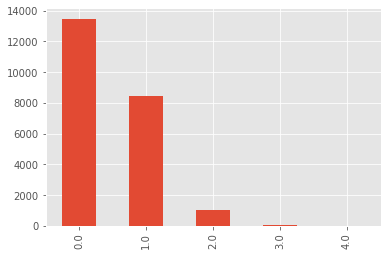

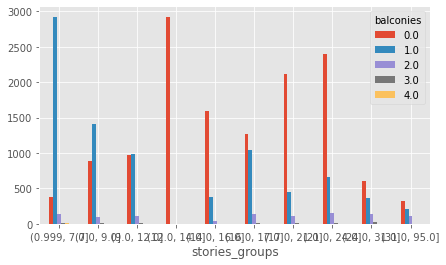

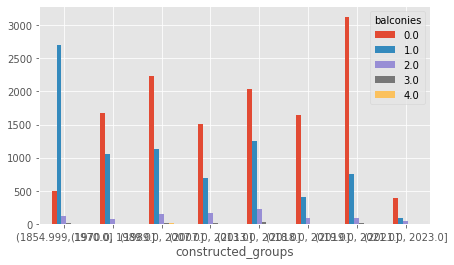

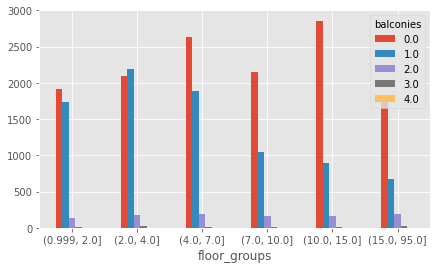

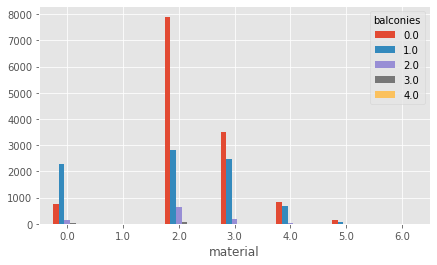

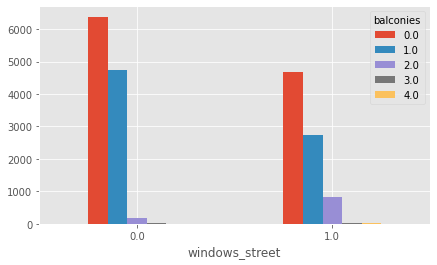

In [89]:
#balconies and loggias
all_data['balconies'].value_counts().plot(kind='bar')
#no clear tendency
plot_categorical(all_data, 'stories_groups', 'balconies')
plot_categorical(all_data, 'constructed_groups', 'balconies')
plot_categorical(all_data, 'district', 'balconies')
plot_categorical(all_data, 'radius_groups', 'balconies')
plot_categorical(all_data, 'material', 'balconies')
plot_categorical(all_data, 'windows_street', 'balconies')




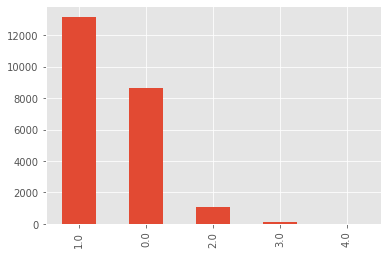

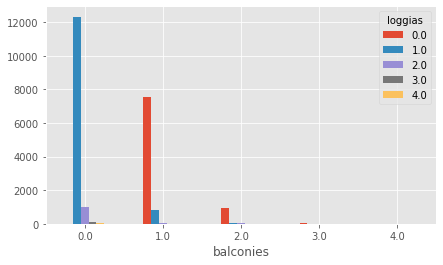

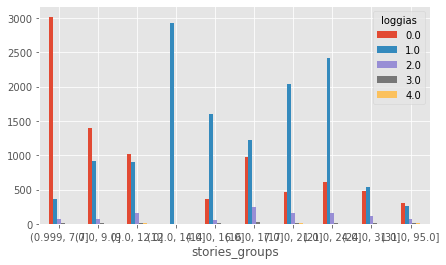

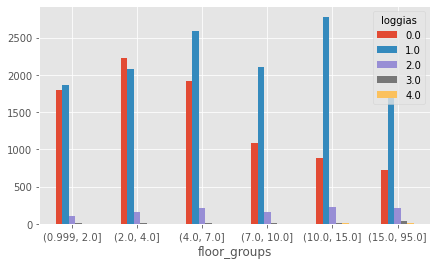

In [90]:
all_data['loggias'].value_counts().plot(kind='bar')
#no clear tendency

plot_categorical(all_data,'balconies','loggias')
plot_categorical(all_data, 'stories_groups', 'loggias')
plot_categorical(all_data, 'floor_groups', 'loggias')

In [ ]:
#condition, togehter with building year
plot_categorical(all_data,'condition','constructed')
#we can see that most new building are of condition one, for the rest not so clear

In [ ]:
#new, quite clear
all_data['new'].value_counts().plot(kind='bar')
#quite clear tendency, will be even better with some other information

In [ ]:
#new and constructed
plot_categorical(all_data,'new','constructed')
#good data, can use new to predict constructed and vice versa to fix.

In [ ]:
#new and seller
plot_categorical(all_data,'new','seller')
#very good, can be used to predict new and vice versa

In [ ]:
#new and layout
plot_categorical(all_data,'new','layout')
# totally ok, will probably use somehting else to predict new, and layout is mostly just one category.

In [ ]:
#new and condition
plot_categorical(all_data,'new','condition')
#totally ok, can be used to predict that new almost just has condition 0.

In [ ]:
#material
all_data['material'].value_counts().plot(kind='bar')
#quite clear which is most common, if you have som additional information could be good.

plot_categorical(all_data,'new','material')
plot_categorical(all_data,'condition','material')
plot_categorical(all_data,'elevator_without','material')
plot_categorical(all_data,'constructed_groups','material')
plot_categorical(all_data,'district','material')
plot_categorical(all_data,'parking','material')
plot_categorical(all_data,'stories_groups','material')
plot_categorical(all_data,'area_groups','material')


In [ ]:
#material and layout
plot_categorical(all_data,'layout','material')
#layout is to equal to one to be affected

In [ ]:
#material and new
plot_categorical(all_data,'new','material')
#can be used to be quite sure that new buildings is constructed with material number 2

In [ ]:
#material and condtion
plot_categorical(all_data,'condition','material')
#quite good news, clear correleation that material 2 gives condtion 0, and material 3 gives condtion 1.

In [ ]:
#'elevator_without', 'elevator_passenger', 'elevator_service', 'parking',
# 'garbage_chute', 'heating']
#plot one for each elevator, elevator without
all_data['elevator_without'].value_counts().plot(kind='bar')
#not very clear, cant be so sure about this one, just states the there are appartmens without elevator access within the building


In [ ]:
#elevator passenger
all_data['elevator_passenger'].value_counts().plot(kind='bar')
#very nice! can assume tha almost everybody has a elevator passenger, should find out what categorizises the one who dont have

In [ ]:
#elevator service
all_data['elevator_service'].value_counts().plot(kind='bar')
#totally ok information, but is not super clear. however gives a good indication if we can find somethign else

In [ ]:
#without and passegner togheter
plot_categorical(all_data,'elevator_without','elevator_passenger')
#if there is no appartmens without elevator, then there is almost certainly a passegner elevator.

In [ ]:
#without and service
plot_categorical(all_data,'elevator_without','elevator_service')
#no good correleation, very similar

In [ ]:
#service and passegner
plot_categorical(all_data,'elevator_passenger','elevator_service')
#again quite good, if there is no passenger elevator there is no service elevator. If there is a passegner elevator, there is most likelt a service elevator.

In [ ]:
#we can check elevator without again, as this is the most unclear one.
plot_categorical(all_data,'elevator_without','garbage_chute')
#with new: some information, conditon:more information, material:more information(just one type)
#seller:some information, parking:more information+, (heating,garbage none)

In [ ]:
#elevator Without was best found through elevator passegner, so lets check this.
plot_categorical(all_data, 'elevator_passenger','parking')
#parking:totally ok, if there is no elevator passenger, most likely 1, if parking is 2, then there is elevator passegner
#condtion:bad, new: if there is no passegner, its not new, material:some information
#if seller i 3 then passegner 1, (heating and garbage_chute bad)

In [ ]:
#'parking',
all_data['parking'].value_counts().plot(kind='bar')
#not so much information, but parking 2 can make some exiting results in others. lets check this
plot_categorical(all_data,'new','parking')
plot_categorical(all_data,'material','parking')
plot_categorical(all_data,'elevator_without','parking')
plot_categorical(all_data,'stories_groups','parking')
plot_categorical(all_data,'radius_groups','parking')
plot_categorical(all_data,'parking','radius_groups')

In [ ]:
#parking and layout (layout has a lot of missing values)
plot_categorical(all_data,'parking','layout')
#conclusion: layout is most likely 1 anyways, would be interesting to see if there is something to tell if 0 and 1

In [ ]:
#parking and new
plot_categorical(all_data,'new','parking')
#conclusion: if parking is 2, most likely new 0. but not that clear

In [ ]:
#parking and condtion
plot_categorical(all_data,'material','parking')
#if parking is 0, then material is 2, if material is 3, then parking is 1. material 2, most likely parking 0
#seller:not good,

In [ ]:
#parking and conditon
plot_categorical(all_data,'condition', 'parking')
#if condition is 1, then parking is 1, if condtion is 0, then parking could be 0 (same for condtion 3)
#material, condition, seller, windows??

In [ ]:
#garbage_chute
all_data['garbage_chute'].value_counts().plot(kind='bar')
#most likely 1 for this one, but there is no correlation betweem anyone

In [ ]:
#garbage_chute and heating
plot_categorical(all_data,'heating', 'garbage_chute')
#if heating is 2, then garbage_chute is 0, else it is not very good

In [ ]:
#heating
all_data['heating'].value_counts().plot(kind='bar')
#heating is most likely 0 anyway. Could be interesting to see if there is something with the 1,2,3 heating.

In [ ]:
#rooms
all_data['rooms'].value_counts().plot(kind='bar')

In [ ]:
#rooms and layout
plot_categorical(all_data,'rooms', 'layout')
#again, layout is just to bad to say somethin about others.

In [ ]:
#rooms and parking, and rooms and new
plot_categorical(all_data,'parking', 'rooms')
#the more rooms, the higher chance for 0 parking.

plot_categorical(all_data, 'rooms','new')
#the more rooms, the lower chance of being new. But mostlt is not new, so would be interesting to find somehting which the new ones had on common.

plot_categorical(all_data, 'rooms','ceiling_groups')
#material:bad, condition:bad, floor and stories:bad

#check compared to area
plot_categorical(all_data, 'rooms','area_groups')

In [ ]:
#Bathrooms_priavte
all_data['bathrooms_private'].value_counts().plot(kind='bar')
#ikke noe spesielt å henter her

In [ ]:
#bathrooms shared
all_data['bathrooms_shared'].value_counts().plot(kind='bar')
#ikke noe spesielt her heller

In [ ]:
#Bathrooms_priavte and bathrooms_shared
plot_categorical(all_data, 'bathrooms_shared','bathrooms_private')
#very good as expected, lets see if there is any way to precit the two others

In [ ]:
#check compared to area
plot_categorical(all_data,'area_groups','bathrooms_private')
#low area, most likely no private bathroom

plot_categorical(all_data,'area_groups','bathrooms_shared')
#low area, most likely shared bathroom, everybodt has a bathroom

In [ ]:
#ceiling
all_data['ceiling_groups'].value_counts().plot(kind='bar')

#ceiling groups and layout, condtion and material
plot_categorical(all_data,'ceiling_groups','material')
plot_categorical(all_data,'area_groups','ceiling_groups')
plot_categorical(all_data,'ceiling_groups','condition')
plot_categorical(all_data,'new','ceiling_groups')
plot_categorical(all_data,'ceiling_groups','rooms')
plot_categorical(all_data,'ceiling_groups','parking')

#Layout:bad, material:good, most likely material 2 if high ceiling, material 3 if super low
#if low ceiling, condtion 1, if cieling in 3.0-3.1, condtion 0
#if material 4, then low ceiling.

In [ ]:
all_data = add_direction(all_data)
#all_data['district'].value_counts().plot(kind='bar')
#plot_categorical(all_data,'district','radius_groups')
#plot_categorical(all_data[all_data['radius'] < 0.02], 'direction','district')
#if there is no missing values in a column, this can be used to guess other columns, if there is a lot of missing values, these columns should be guessed
#plot_categorical()


all_data.info()
#layout is by

## **Use of found information**
Lets try to use the information we just discovered
I want to mainly use this information to predict missing values.

I will start by summing up what i learned, and then use this to make rules.

Layout has by far the most missing values, and there is no correleation with other things to detect anything deifferent than that we can just put all the missing values in layout to 1.

Next up is balconies and loggias. From my plot you can see that if you dont have a loggias, you have most likely one balcony.
However if you have any loggias, you dont have balconies.

In [92]:
all_data_2 = all_data
def fix_missing_value(df):
    #layout, set everythin to 1
    df['layout'].fillna(int(1.0),inplace=True)



    #found correleation between number of stories and balconies,loggias
    df.loc[(df['stories'] < 7.0)&df['loggias'].isna(),'loggias'] = 0
    df.loc[(df['stories'] < 7.0)&df['balconies'].isna(),'balconies'] = 1

    df.loc[((df['stories'] > 12) & (df['stories'] < 16))|((df['stories'] > 17) & (df['stories'] < 24))&(df['loggias'].isna()),'loggias'] = 1
    df.loc[((df['stories'] > 12) & (df['stories'] < 16))|((df['stories'] > 17) & (df['stories'] < 24))&(df['loggias'].isna()),'balconies'] = 0


    #use the correleation between balconies and loggias to replace nans,
    df.loc[(df['loggias'] == 0.0 )& df['balconies'].isna(),'balconies'] = 1
    df.loc[(df['balconies'] == 0.0 )& df['loggias'].isna(),'loggias'] = 1
    df.loc[(df['loggias'] > 0.0 )& df['balconies'].isna(),'balconies'] = 0
    df.loc[(df['balconies'] > 0.0 )& df['loggias'].isna(),'loggias'] = 0

    #use correlation between material and ceiling groups
    ceiling_under_2 = len(df[((df['material'] == 4)|(df['material'] == 3)) & df['ceiling'].isna()])
    sample = df[df['ceiling'] < 2.6]['ceiling'].sample(n=ceiling_under_2,replace=True).to_numpy()
    df.loc[((df['material'] == 4)|(df['material'] == 3)) & (df['ceiling'].isna()),'ceiling'] = sample
    #use corelation between condition and ceiling groups
    ceiling_under_2 = len(df[(df['condition'] == 1) & df['ceiling'].isna()])
    sample = df[df['ceiling'] < 2.6]['ceiling'].sample(n=ceiling_under_2,replace=True).to_numpy()
    df.loc[(df['condition'] == 1) & df['ceiling'].isna(),'ceiling'] = sample


    #use correleation betwwen ceiling and area
    ceiling_over_3 = len(df[(df['area_total'] > 104)&(df['ceiling'].isna())])
    sample = df[df['ceiling'] > 3.0]['ceiling'].sample(n=ceiling_over_3,replace=True).to_numpy()
    df.loc[(df['area_total'] > 104)&(df['ceiling'].isna() ),'ceiling'] = sample

    ceiling_over_3 = len(df[(df['area_total'] > 75)&(df['ceiling'].isna())])
    sample = df[df['ceiling'] > 2.95]['ceiling'].sample(n=ceiling_over_3,replace=True).to_numpy()
    df.loc[(df['area_total'] > 75)&(df['ceiling'].isna() ),'ceiling'] = sample

    ceiling_under_2 = len(df[(df['area_total'] < 55)&(df['ceiling'].isna())])
    sample = df[df['ceiling'] < 2.8]['ceiling'].sample(n=ceiling_under_2,replace=True).to_numpy()
    df.loc[(df['area_total'] < 55)&(df['ceiling'].isna() ),'ceiling'] = sample

    #seller
    #use correleation between seller and new
    df.loc[(df['new'] == 1 )& df['seller'].isna(),'seller'] = 3

    #use correleation between seller and constructed
    df.loc[(df['constructed'] > 2018)& df['seller'].isna(),'seller'] = 3
    df.loc[(df['constructed'] < 1990)& df['seller'].isna(),'seller'] = 1

    #use correleation between seller and stories
    df.loc[(df['stories'] > 17)& df['seller'].isna(),'seller'] = 3
    df.loc[(df['stories'] < 9)& df['seller'].isna(),'seller'] = 1

    #use correleation between seller and district
    df.loc[((df['district'] == 3)|(df['district']==6))& df['seller'].isna(),'seller'] = 1
    df.loc[((df['district'] == 11)|(df['district']==2))& df['seller'].isna(),'seller'] = 3

    #conditon
    #use correleation between condition and new
    df.loc[(df['new'] == 1)& df['condition'].isna(),'condition'] = 0

    #use correleation between condition and constructed year
    df.loc[(df['constructed'] >= 2017)& df['condition'].isna(),'condition'] = 0
    df.loc[(df['constructed'] <= 1989)& df['condition'].isna(),'condition'] = 1

    #material
    #use correlation between material and district
    df.loc[(df['district'] == 3)& df['material'].isna(),'material'] = 3

    #use correleation between material and constructed year
    df.loc[((df['constructed'] > 1970)& (df['constructed'] <= 1989))&df['material'].isna(),'material'] = 3
    df.loc[(df['constructed'] <= 1970)&df['material'].isna(),'material'] = 0

    #use correleation between stories and material
    df.loc[(df['stories'] < 7)& df['material'].isna(),'material'] = 0
    df.loc[((df['stories'] > 7)&(df['stories'] < 9))& df['material'].isna(),'material'] = 3

    #use correleation between conditon and material
    df.loc[(df['condition'] == 3)& df['material'].isna(),'material'] = 3
    df.loc[(df['condition'] == 0)& df['material'].isna(),'material'] = 2

    #use correleation between parking and material
    df.loc[((df['parking'] == 3)|(df['parking'] == 2))& df['material'].isna(),'material'] = 2

    #user correlation between area and material
    df.loc[(df['area_total'] > 104)& df['material'].isna(),'material'] = 2

    #parking
    #use coreletion between parking and material
    df.loc[((df['material'] == 0)|(df['material'] == 3))& df['parking'].isna(),'parking'] = 1

    #use correleation between stories and parking
    df.loc[((df['stories'] > 30))& df['parking'].isna(),'parking'] = 0
    df.loc[((df['stories'] > 7)&(df['stories'] < 9))& df['parking'].isna(),'parking'] = 1

    #use correleation between radius and parking
    df.loc[(df['radius'] < 0.0547)& df['parking'].isna(),'parking'] = 0
    df.loc[(df['radius'] > 0.251)& df['parking'].isna(),'parking'] = 1

    #windows_court and windows_street
    #windows_street and balconies
    df.loc[(df['balconies'] == 2)& df['windows_street'].isna(),'windows_street'] = 1

    #windows street and area
    df.loc[(df['area_total'] > 106)& df['windows_street'].isna(),'windows_street'] = 1
    df.loc[(df['area_total'] < 47)& df['windows_street'].isna(),'windows_street'] = 0

    #windwos_street and stories
    df.loc[(df['stories'] > 40)& df['windows_street'].isna(),'windows_street'] = 1
    df.loc[(df['stories'] < 9)& df['windows_street'].isna(),'windows_street'] = 0

    #windows_street and windows_court
    df.loc[(df['windows_street'] == 0)& df['windows_court'].isna(),'windows_court'] = 1

    df.loc[((df['windows_street'] == 1)& (df['area_total'] > 75)) & df['windows_court'].isna(),'windows_court'] = 1
    df.loc[((df['windows_street'] == 1)& (df['area_total'] < 47)) & df['windows_court'].isna(),'windows_court'] = 0

    #balconies
    #balconies and stories
    df.loc[((df['stories'] >= 12)& (df['area_total'] <= 16)) & df['balconies'].isna(),'balconies'] = 0
    df.loc[(df['stories'] < 7) & df['balconies'].isna(),'balconies'] = 1
    df.loc[((df['stories'] > 17)& (df['area_total'] <= 24)) & df['balconies'].isna(),'balconies'] = 0

    #matrial and balconies
    df.loc[(df['material'] == 0) & df['balconies'].isna(),'balconies'] = 1
    df.loc[(df['material'] == 2) & df['balconies'].isna(),'balconies'] = 0

    #balconies and constructed
    df.loc[(df['constructed'] < 1970) & df['balconies'].isna(),'balconies'] = 1
    df.loc[(df['constructed'] > 2018) & df['balconies'].isna(),'balconies'] = 0

    #loggias
    #loggias and balconies
    df.loc[(df['balconies'] == 0) & df['loggias'].isna(),'loggias'] = 1
    df.loc[(df['balconies'] > 0) & df['loggias'].isna(),'loggias'] = 0

    #loggias and stories
    df.loc[(df['stories'] < 7) & df['loggias'].isna(),'loggias'] = 0
    df.loc[((df['stories'] >= 17)& (df['area_total'] <= 24)) & df['loggias'].isna(),'loggias'] = 1

    #bathrooms shared, bathroomes private

    #loggias and blaconies



    return df

all_data_2 = fix_missing_value(all_data_2)


all_data_2.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33222 entries, 0 to 33221
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  33222 non-null  int64   
 1   seller              31072 non-null  float64 
 2   price               23285 non-null  float64 
 3   area_total          33222 non-null  float64 
 4   area_kitchen        26268 non-null  float64 
 5   area_living         27270 non-null  float64 
 6   floor               33222 non-null  float64 
 7   rooms               33222 non-null  float64 
 8   layout              33222 non-null  float64 
 9   ceiling             31066 non-null  float64 
 10  bathrooms_shared    27633 non-null  float64 
 11  bathrooms_private   27633 non-null  float64 
 12  windows_court       27894 non-null  float64 
 13  windows_street      28098 non-null  float64 
 14  balconies           31483 non-null  float64 
 15  loggias             31483 non-null  

# **Differences in test and training set**

In this section i will try to look at the differences in the training and test set. Maybe there is some infomration which is really important in the training set, and not in the test set.
